In [1]:
# analyze and predict health insurance claim amounts based on customer demographics, health conditions, and lifestyle factors


In [253]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [255]:
df=pd.read_csv("C:/Users/DELL/Documents/healthinsurance.csv.xls")
df.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0


In [257]:
df.shape

(15000, 13)

In [259]:
#there are 15000 rows and 13 columns 

In [261]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [265]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


# Find null values

In [267]:
df.count()

age                    14604
sex                    15000
weight                 15000
bmi                    14044
hereditary_diseases    15000
no_of_dependents       15000
smoker                 15000
city                   15000
bloodpressure          15000
diabetes               15000
regular_ex             15000
job_title              15000
claim                  15000
dtype: int64

# check column-wise data in dataset

In [271]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

# check row-wise data in dataset

In [274]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Length: 15000, dtype: int64

In [276]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [278]:
df.isnull().sum()

age                      0
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [280]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [282]:
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [284]:
df['sex'].value_counts()

sex
female    7652
male      7348
Name: count, dtype: int64

In [286]:
df['hereditary_diseases'].value_counts()

hereditary_diseases
NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: count, dtype: int64

In [288]:
df['hereditary_diseases'].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [290]:
df['city'].value_counts()

city
NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Trenton        69
York           69
Baltimore      69
Syracuse       69
Name: count, Length: 91, dtype: int64

In [292]:
#df['city'].nunique()

In [294]:
df['job_title'].value_counts()

job_title
Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper           667
Manager               602
Police                412
Photographer          400
Beautician            385
CEO                   384
Engineer              374
FashionDesigner       371
Politician            370
Accountant            368
Clerks                367
Architect             365
ITProfessional        348
DataScientist         335
Lawyer                309
Academician           306
Doctor                294
DefencePersonnels     292
Technician            283
Chef                  281
FilmDirector          281
Blogger               281
Journalist            275
CA                    272
Farmer                258
Analyst               255
GovEmployee           250
Buisnessman           242
Labourer              210
Name: count, dtype: int64

In [296]:
#df['job_title'].nunique()

In [298]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder

# Label Encoding

In [301]:
lab_enc=LabelEncoder()

In [303]:
df1=lab_enc.fit_transform(df['sex'])
df['sex']=df1
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,0,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,0,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,0,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,0,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,1,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,1,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,1,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,1,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


# One Hot Encoding

In [306]:
#ohe=OneHotEncoder()

In [308]:
#df2=ohe.fit_transform(df['hereditary_diseases'])
#df2

In [310]:
df1=lab_enc.fit_transform(df['hereditary_diseases'])
df['hereditary_diseases']=df1
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,0,75,22.6,8,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,0,64,17.8,4,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,0,53,36.4,8,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,0,50,20.6,8,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,1,49,28.3,8,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,1,74,29.6,8,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,1,62,33.3,8,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,1,88,36.7,8,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [312]:
bE = BinaryEncoder()

In [314]:
df2 = bE.fit_transform(df['city'])
df2

,city_0,city_1,city_2,city_3,city_4,city_5,city_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
14995,0,1,0,0,1,1,0
14996,0,1,0,0,1,1,1
14997,0,1,0,1,0,0,0
14998,0,1,0,1,0,0,1


In [316]:
df2 = bE.fit_transform(df['job_title'])
df2

,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,job_title_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,1,0,1
...,...,...,...,...,...,...
14995,0,1,1,0,0,1
14996,0,0,1,0,1,0
14997,0,1,0,1,1,0
14998,1,0,0,0,0,0


In [318]:
df_encoded= bE.fit_transform(df[['city']])
df= pd.concat([df.drop(columns=['city']),df_encoded],axis=1)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int32  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  int32  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   bloodpressure        15000 non-null  int64  
 8   diabetes             15000 non-null  int64  
 9   regular_ex           15000 non-null  int64  
 10  job_title            15000 non-null  object 
 11  claim                15000 non-null  float64
 12  city_0               15000 non-null  int64  
 13  city_1               15000 non-null  int64  
 14  city_2               15000 non-null  int64  
 15  city_3               15000 non-null 

In [322]:
df_encoded= bE.fit_transform(df[['job_title']])
df= pd.concat([df.drop(columns=['job_title']),df_encoded],axis=1)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int32  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  int32  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   bloodpressure        15000 non-null  int64  
 8   diabetes             15000 non-null  int64  
 9   regular_ex           15000 non-null  int64  
 10  claim                15000 non-null  float64
 11  city_0               15000 non-null  int64  
 12  city_1               15000 non-null  int64  
 13  city_2               15000 non-null  int64  
 14  city_3               15000 non-null  int64  
 15  city_4               15000 non-null 

In [326]:
#df('city')=df('city').astype(int)

# Box plot

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

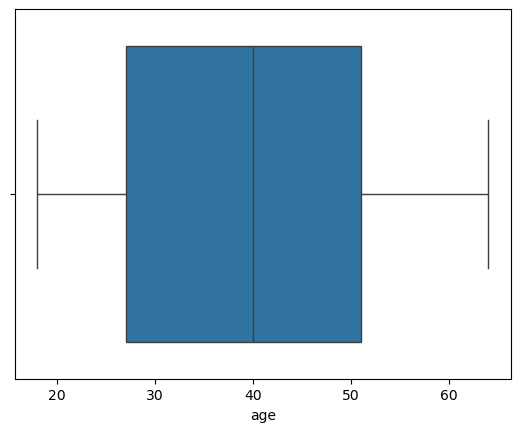

In [331]:
sns.boxplot(x='age',data=df)
plt.show()

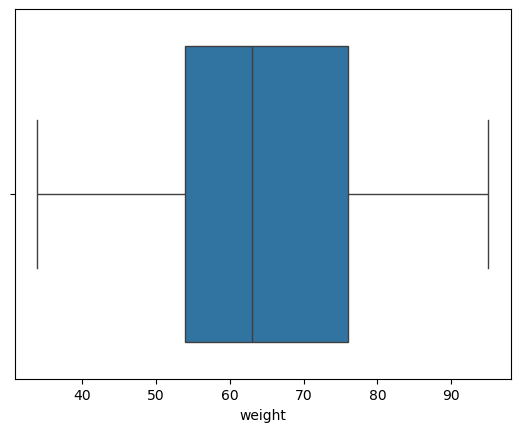

In [332]:
sns.boxplot(x='weight',data=df)
plt.show()

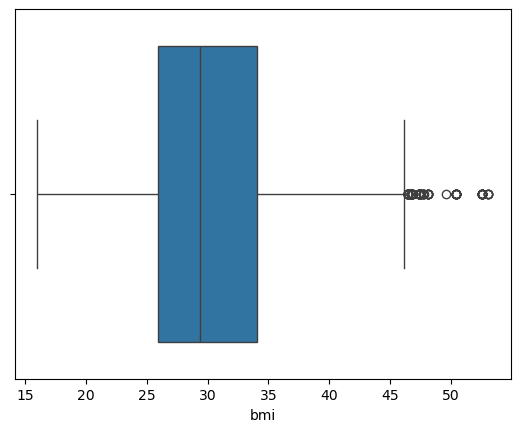

In [334]:
sns.boxplot(x='bmi',data=df)
plt.show()

# Remove outliers

In [337]:
q1=df.quantile(0.25)
q1

age                      27.0
sex                       0.0
weight                   54.0
bmi                      25.9
hereditary_diseases       8.0
no_of_dependents          0.0
smoker                    0.0
bloodpressure            64.0
diabetes                  1.0
regular_ex                0.0
claim                  4846.9
city_0                    0.0
city_1                    0.0
city_2                    0.0
city_3                    0.0
city_4                    0.0
city_5                    0.0
city_6                    0.0
job_title_0               0.0
job_title_1               0.0
job_title_2               0.0
job_title_3               0.0
job_title_4               0.0
job_title_5               0.0
Name: 0.25, dtype: float64

In [338]:
q3=df.quantile(0.75)
q3

age                       51.000
sex                        1.000
weight                    76.000
bmi                       34.100
hereditary_diseases        8.000
no_of_dependents           2.000
smoker                     0.000
bloodpressure             80.000
diabetes                   1.000
regular_ex                 0.000
claim                  16519.125
city_0                     1.000
city_1                     1.000
city_2                     1.000
city_3                     1.000
city_4                     1.000
city_5                     1.000
city_6                     1.000
job_title_0                0.000
job_title_1                1.000
job_title_2                1.000
job_title_3                1.000
job_title_4                1.000
job_title_5                1.000
Name: 0.75, dtype: float64

In [339]:
iqr=q3-q1
iqr

age                       24.000
sex                        1.000
weight                    22.000
bmi                        8.200
hereditary_diseases        0.000
no_of_dependents           2.000
smoker                     0.000
bloodpressure             16.000
diabetes                   0.000
regular_ex                 0.000
claim                  11672.225
city_0                     1.000
city_1                     1.000
city_2                     1.000
city_3                     1.000
city_4                     1.000
city_5                     1.000
city_6                     1.000
job_title_0                0.000
job_title_1                1.000
job_title_2                1.000
job_title_3                1.000
job_title_4                1.000
job_title_5                1.000
dtype: float64

In [340]:
preg_high=q3.bmi+1.5*iqr.bmi
preg_high

46.400000000000006

In [341]:
index_=np.where(df['bmi']>preg_high)
index_

(array([   64,    98,    99,   197,   313,   381,   492,   539,   667,
          693,  1108,  1271,  1283,  1404,  1480,  1608,  1662,  1688,
         1784,  2094,  2139,  2159,  2180,  2246,  2260,  2388,  2460,
         2604,  2751,  2817,  3227,  3272,  3599,  4074,  4125,  4158,
         4251,  4472,  4532,  4680,  4818,  4867,  4926,  4969,  4990,
         5150,  5316,  5472,  5505,  5629,  5733,  5762,  6122,  6127,
         6164,  6204,  6314,  6413,  6539,  6592,  6731,  6740,  6844,
         6896,  7345,  7434,  7460,  7483,  7498,  7530,  7556,  7580,
         7950,  8231,  8234,  8264,  8349,  8351,  8406,  8725,  8815,
         8860,  9108,  9120,  9261,  9295,  9320,  9428,  9531,  9539,
         9850, 10277, 10337, 10440, 10571, 10787, 10961, 11112, 11113,
        11212, 11262, 11425, 11437, 11568, 11575, 11644, 11879, 12093,
        12211, 12325, 12425, 12515, 12551, 12766, 12876, 12892, 12925,
        12990, 13063, 13070, 13207, 13261, 13451, 13483, 13492, 13522,
      

In [344]:
df=df.drop(df.index[index_])

In [349]:
df.reset_index()

,index,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,...,city_3,city_4,city_5,city_6,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,job_title_5
0,0,60.0,1,64,24.3,8,1,0,72,0,...,0,0,0,1,0,0,0,0,0,1
1,1,49.0,0,75,22.6,8,1,0,78,1,...,0,0,1,0,0,0,0,0,1,0
2,2,32.0,0,64,17.8,4,2,1,88,1,...,0,0,1,1,0,0,0,0,1,1
3,3,61.0,0,53,36.4,8,1,1,72,1,...,0,1,0,0,0,0,0,1,0,0
4,4,19.0,0,50,20.6,8,0,0,82,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14851,14995,39.0,1,49,28.3,8,1,1,54,1,...,0,1,1,0,0,1,1,0,0,1
14852,14996,39.0,1,74,29.6,8,4,0,64,1,...,0,1,1,1,0,0,1,0,1,0
14853,14997,20.0,1,62,33.3,8,0,0,52,1,...,1,0,0,0,0,1,0,1,1,0
14854,14998,52.0,1,88,36.7,8,0,0,70,1,...,1,0,0,1,1,0,0,0,0,0


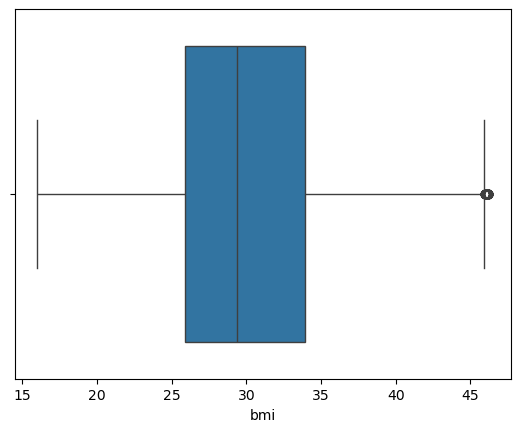

In [351]:
sns.boxplot(x='bmi',data=df)
plt.show()

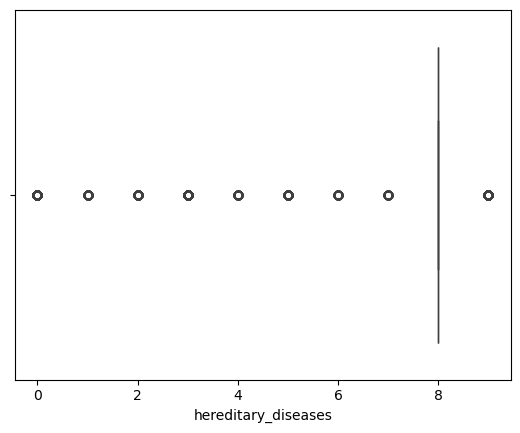

In [353]:
sns.boxplot(x='hereditary_diseases',data=df)
plt.show()

In [354]:
preg_low=q1.hereditary_diseases-1.5*iqr.hereditary_diseases
preg_low

8.0

In [356]:
index_2=np.where(df['hereditary_diseases']<preg_low)

In [358]:
df=df.drop(df.index[index_2])

In [362]:
df.reset_index()

,index,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,...,city_3,city_4,city_5,city_6,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,job_title_5
0,0,60.0,1,64,24.3,8,1,0,72,0,...,0,0,0,1,0,0,0,0,0,1
1,1,49.0,0,75,22.6,8,1,0,78,1,...,0,0,1,0,0,0,0,0,1,0
2,3,61.0,0,53,36.4,8,1,1,72,1,...,0,1,0,0,0,0,0,1,0,0
3,4,19.0,0,50,20.6,8,0,0,82,1,...,0,1,0,1,0,0,0,1,0,1
4,5,42.0,0,89,37.9,8,0,0,78,0,...,0,1,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14012,14995,39.0,1,49,28.3,8,1,1,54,1,...,0,1,1,0,0,1,1,0,0,1
14013,14996,39.0,1,74,29.6,8,4,0,64,1,...,0,1,1,1,0,0,1,0,1,0
14014,14997,20.0,1,62,33.3,8,0,0,52,1,...,1,0,0,0,0,1,0,1,1,0
14015,14998,52.0,1,88,36.7,8,0,0,70,1,...,1,0,0,1,1,0,0,0,0,0


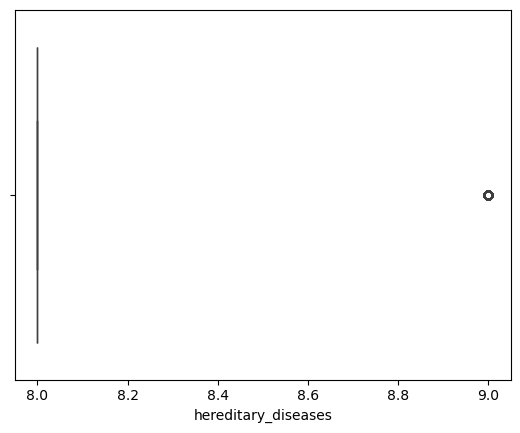

In [364]:
sns.boxplot(x='hereditary_diseases',data=df)
plt.show()

<Axes: xlabel='no_of_dependents'>

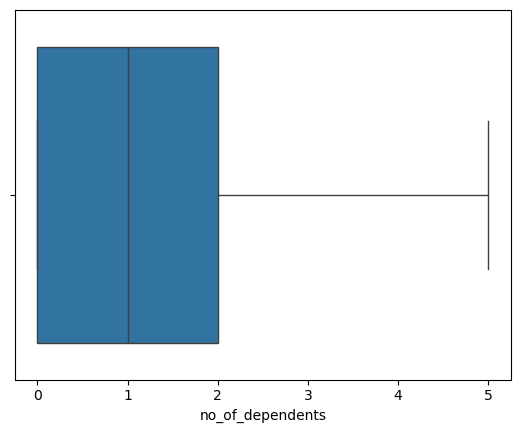

In [365]:
sns.boxplot(x='no_of_dependents',data=df)
#plt.show()

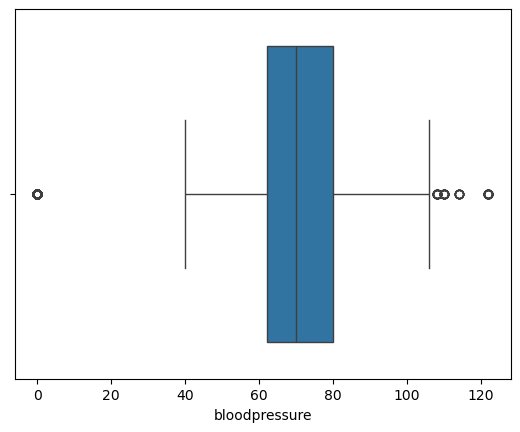

In [367]:
sns.boxplot(x='bloodpressure',data=df)
plt.show()

In [368]:
preg_high=q3.bloodpressure+1.5*iqr.bloodpressure
preg_high

104.0

In [370]:
index_3=np.where(df['bloodpressure']>preg_high)
index_3

(array([   42,    51,   446,   523,   649,   850,   876,   924,   947,
         1436,  1445,  1477,  1729,  2056,  2232,  2240,  2336,  2478,
         2597,  2662,  2689,  2838,  2918,  3010,  3166,  3279,  3400,
         3457,  3856,  3864,  3954,  3964,  4222,  4564,  4667,  4912,
         4950,  4986,  4990,  5010,  5033,  5146,  5153,  5192,  5382,
         5690,  5935,  5996,  6010,  6015,  6173,  6294,  6300,  6443,
         6780,  6869,  7058,  7278,  7407,  7420,  7852,  7921,  7931,
         8018,  8059,  8539,  8676,  8962,  9191,  9514,  9553,  9577,
         9595,  9688,  9745,  9824,  9872,  9982, 10026, 10057, 10213,
        10240, 10257, 10288, 10295, 10519, 10660, 10996, 11038, 11080,
        11169, 11178, 11332, 11354, 11629, 11631, 11644, 11736, 11743,
        11831, 11871, 11988, 12019, 12033, 12308, 12460, 12535, 12711,
        12716, 12742, 12970, 13006, 13136, 13510, 13576, 13929],
       dtype=int64),)

In [373]:
df=df.drop(df.index[index_3])

In [376]:
df.reset_index()

,index,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,...,city_3,city_4,city_5,city_6,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,job_title_5
0,0,60.0,1,64,24.3,8,1,0,72,0,...,0,0,0,1,0,0,0,0,0,1
1,1,49.0,0,75,22.6,8,1,0,78,1,...,0,0,1,0,0,0,0,0,1,0
2,3,61.0,0,53,36.4,8,1,1,72,1,...,0,1,0,0,0,0,0,1,0,0
3,4,19.0,0,50,20.6,8,0,0,82,1,...,0,1,0,1,0,0,0,1,0,1
4,5,42.0,0,89,37.9,8,0,0,78,0,...,0,1,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13896,14995,39.0,1,49,28.3,8,1,1,54,1,...,0,1,1,0,0,1,1,0,0,1
13897,14996,39.0,1,74,29.6,8,4,0,64,1,...,0,1,1,1,0,0,1,0,1,0
13898,14997,20.0,1,62,33.3,8,0,0,52,1,...,1,0,0,0,0,1,0,1,1,0
13899,14998,52.0,1,88,36.7,8,0,0,70,1,...,1,0,0,1,1,0,0,0,0,0


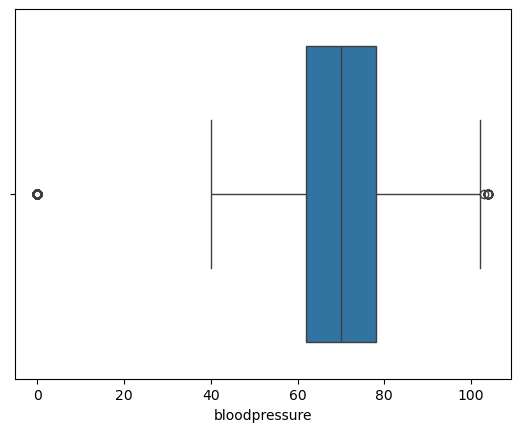

In [378]:
sns.boxplot(x='bloodpressure',data=df)
plt.show()

# EDA

# Univariate

# Categorical data

In [383]:
#sns.countplot(df['sex'])
#df['sex'].value_counts()

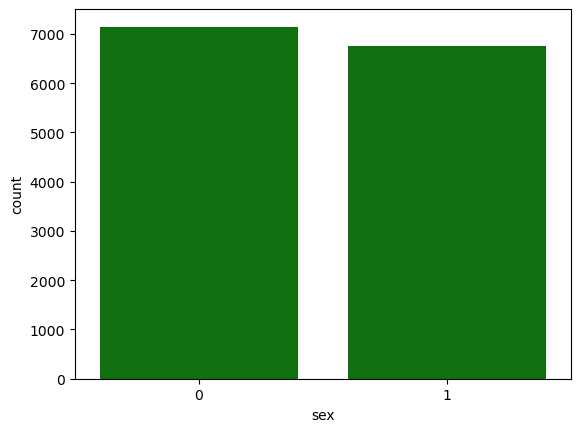

In [385]:
sns.countplot(x='sex',data=df,color='green')
plt.show()

In [386]:
#sns.countplot(df['smoker'])
#df['smoker'].value_counts()

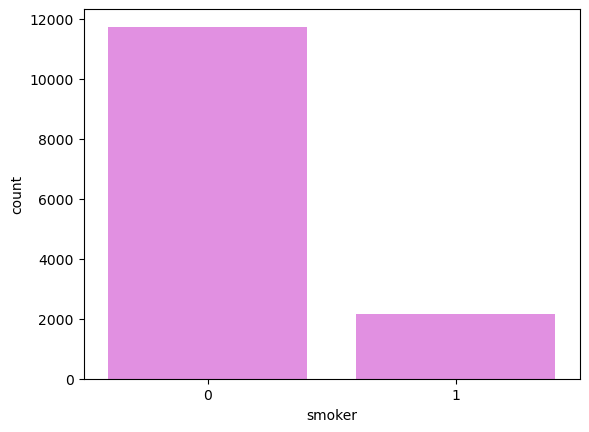

In [389]:
sns.countplot(x='smoker',data=df,color='violet')
plt.show()

In [390]:
#sns.countplot(df['diabetes'])
#df['diabetes'].value_counts()

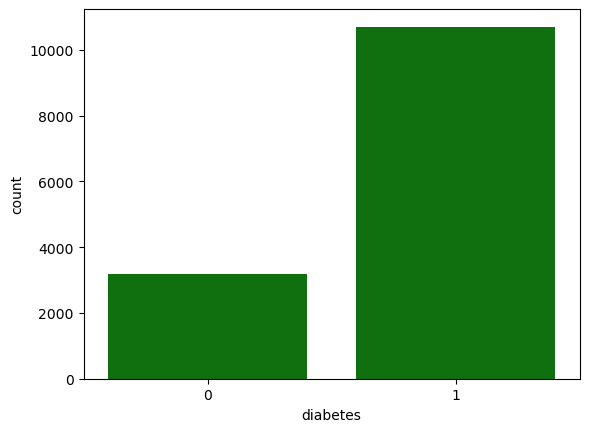

In [393]:
sns.countplot(x='diabetes',data=df,color='green')
plt.show()

In [394]:
#sns.countplot(df['regular_ex'])
#df['regular_ex'].value_counts()

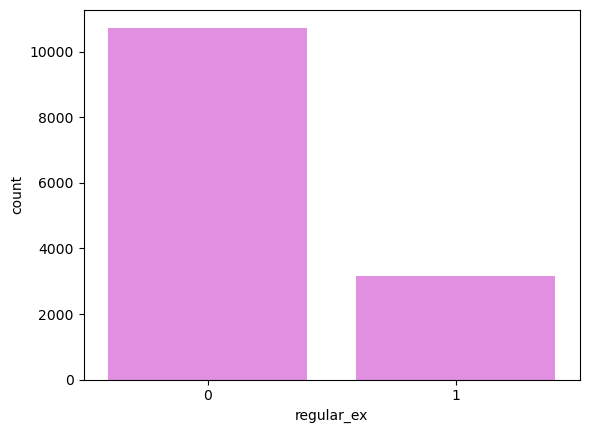

In [397]:
sns.countplot(x='regular_ex',data=df,color='violet')
plt.show()

# Piechart

<Axes: ylabel='count'>

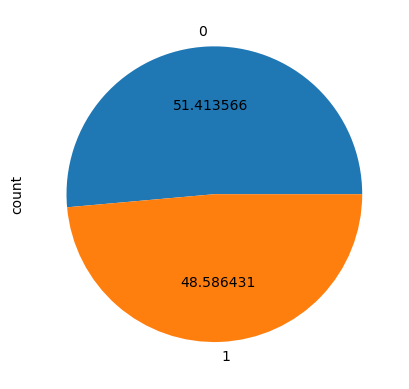

In [400]:
df['sex'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='count'>

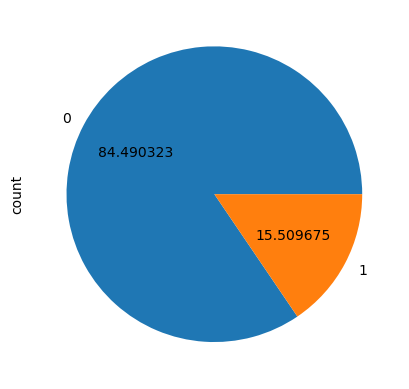

In [402]:
df['smoker'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='count'>

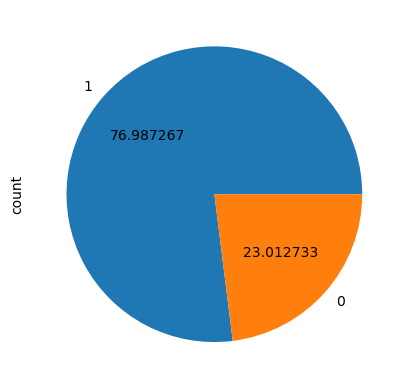

In [404]:
df['diabetes'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='count'>

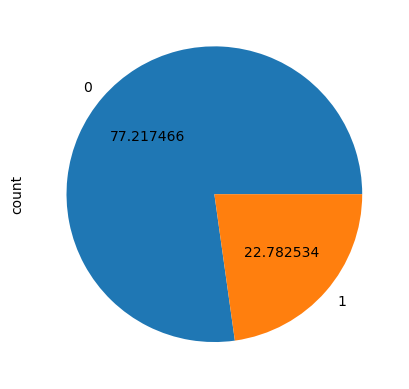

In [406]:
df['regular_ex'].value_counts().plot(kind='pie',autopct='%2f')

# Numerical Data

(array([2231., 1396.,  891., 1418., 1251., 1421., 1458., 1240., 1488.,
        1107.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

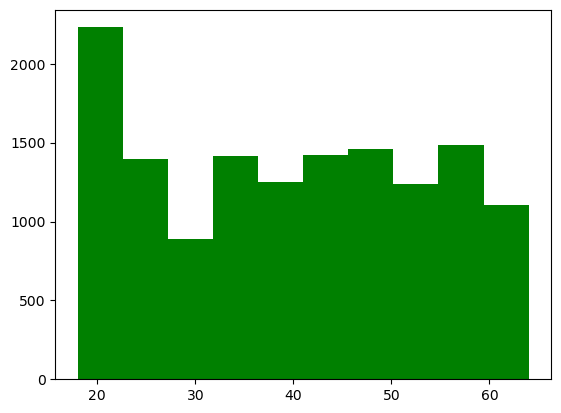

In [409]:
plt.hist(df['age'],color='green')
#plt.show()

(array([ 760., 1463., 2359., 1757., 2075., 1291., 1351., 1173., 1037.,
         635.]),
 array([40. , 45.5, 51. , 56.5, 62. , 67.5, 73. , 78.5, 84. , 89.5, 95. ]),
 <BarContainer object of 10 artists>)

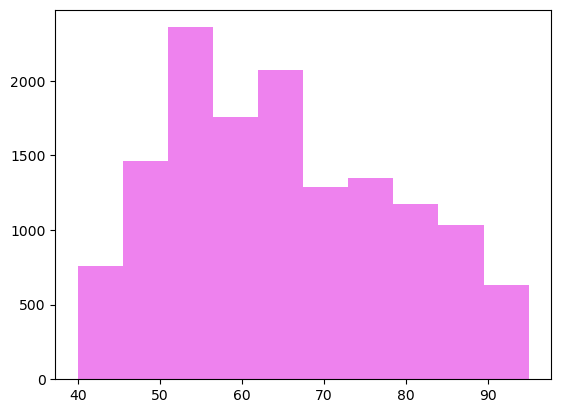

In [410]:
plt.hist(df['weight'],color='violet')
#plt.show()

(array([13765.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   136.]),
 array([8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ]),
 <BarContainer object of 10 artists>)

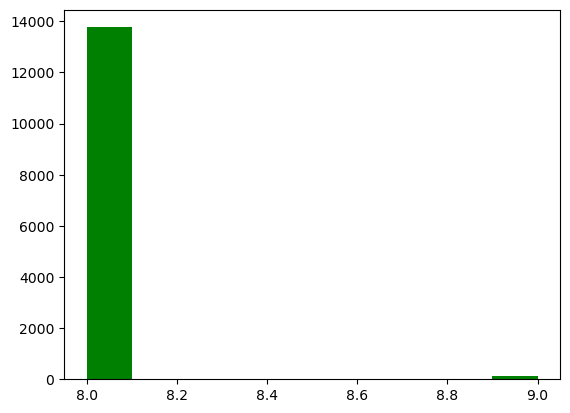

In [412]:
plt.hist(df['hereditary_diseases'],color='green')
#plt.show()

(array([ 279.,  755., 1705., 2716., 2829., 2377., 1564., 1032.,  486.,
         158.]),
 array([16.  , 19.01, 22.02, 25.03, 28.04, 31.05, 34.06, 37.07, 40.08,
        43.09, 46.1 ]),
 <BarContainer object of 10 artists>)

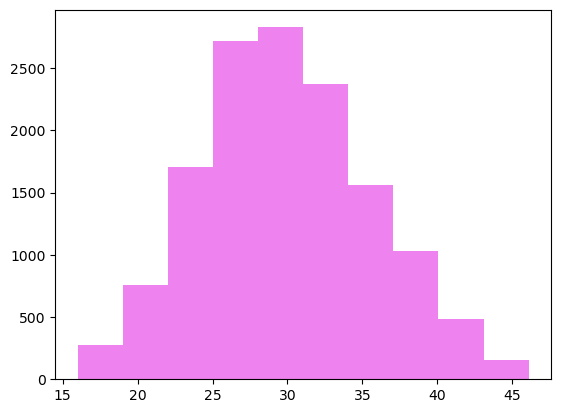

In [414]:
plt.hist(df['bmi'],color='violet')
#plt.show()

(array([5883.,    0., 3341.,    0., 2498.,    0., 1686.,    0.,  279.,
         214.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

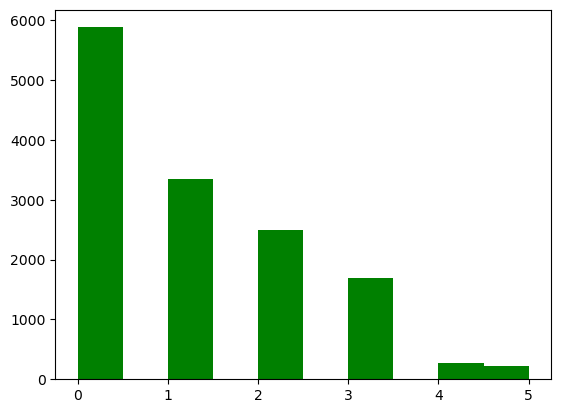

In [415]:
plt.hist(df['no_of_dependents'],color='green')
#plt.show()

(array([ 726.,    0.,    0.,   14.,  418., 2354., 4391., 3920., 1754.,
         324.]),
 array([  0. ,  10.4,  20.8,  31.2,  41.6,  52. ,  62.4,  72.8,  83.2,
         93.6, 104. ]),
 <BarContainer object of 10 artists>)

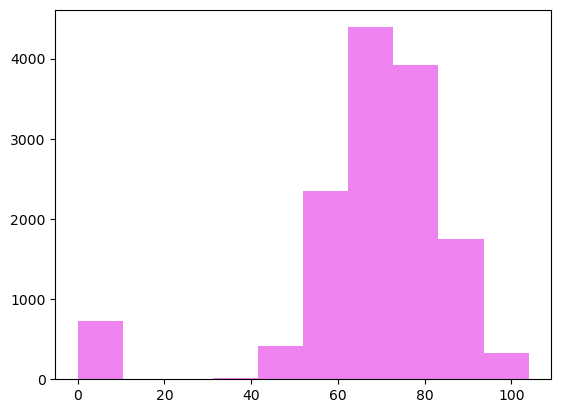

In [417]:
plt.hist(df['bloodpressure'],color='violet')
#plt.show()

(array([5735., 4362., 1494.,  890.,  438.,  345.,  325.,  271.,   16.,
          25.]),
 array([ 1121.9,  7269. , 13416.1, 19563.2, 25710.3, 31857.4, 38004.5,
        44151.6, 50298.7, 56445.8, 62592.9]),
 <BarContainer object of 10 artists>)

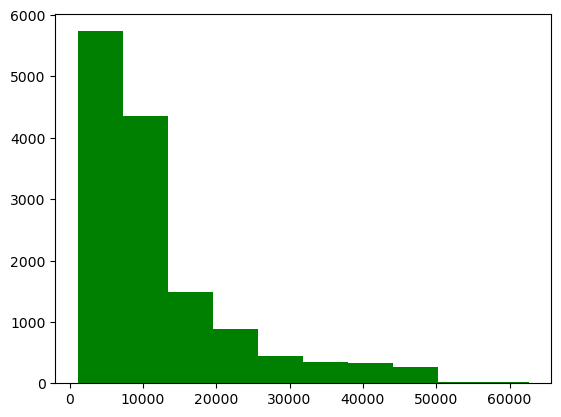

In [419]:
plt.hist(df['claim'],color='green')
#plt.show()

# Distribution plot

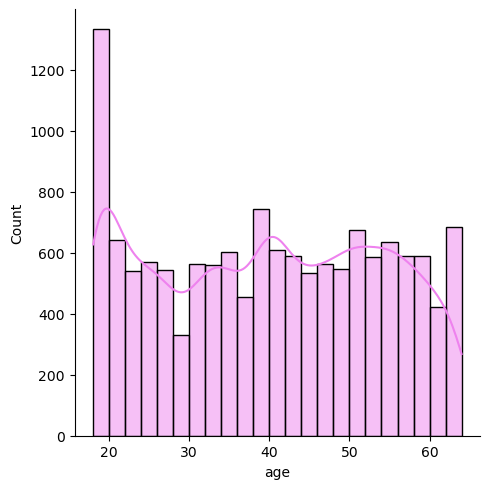

In [423]:
sns.displot(x='age',data=df,color='violet',kde=True)
#plt.show()

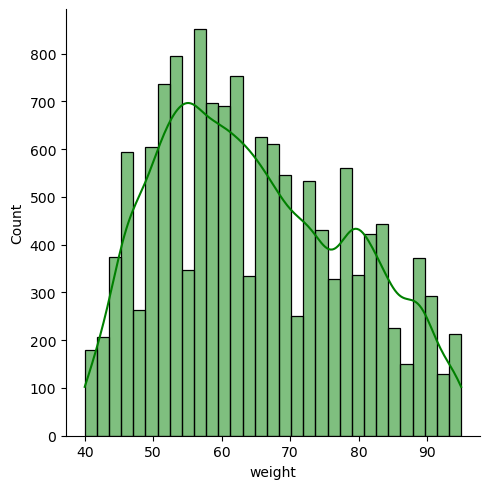

In [424]:
sns.displot(x='weight',data=df,color='green',kde=True)
plt.show()

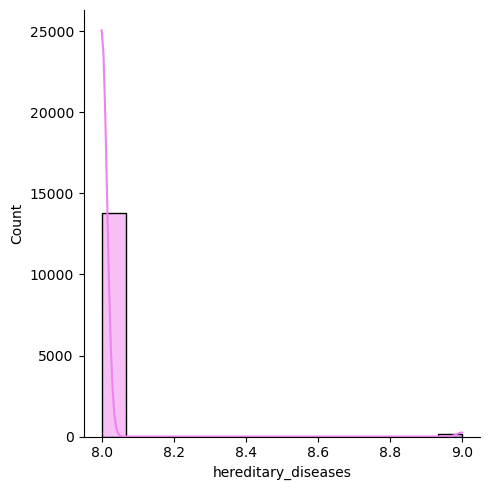

In [426]:
sns.displot(x='hereditary_diseases',data=df,color='violet',kde=True)
plt.show()

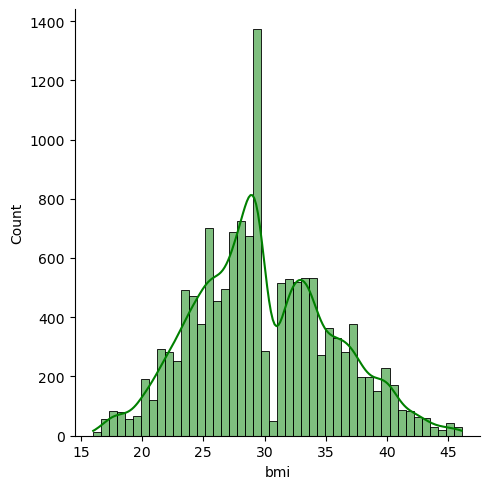

In [427]:
sns.displot(x='bmi',data=df,color='green',kde=True)
plt.show()

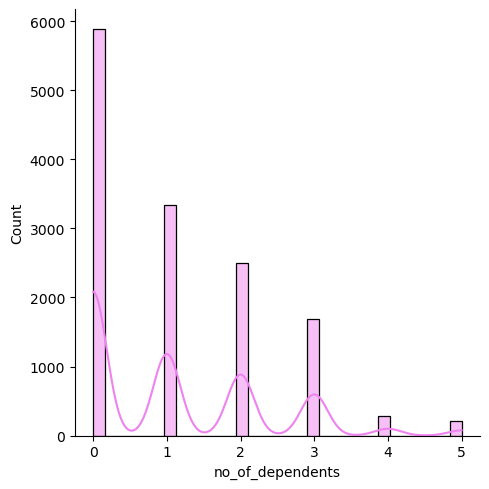

In [428]:
sns.displot(x='no_of_dependents',data=df,color='violet',kde=True)
plt.show()

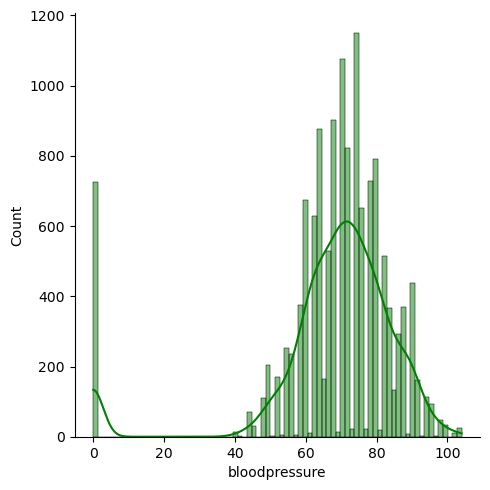

In [430]:
sns.displot(x='bloodpressure',data=df,color='green',kde=True)
plt.show()

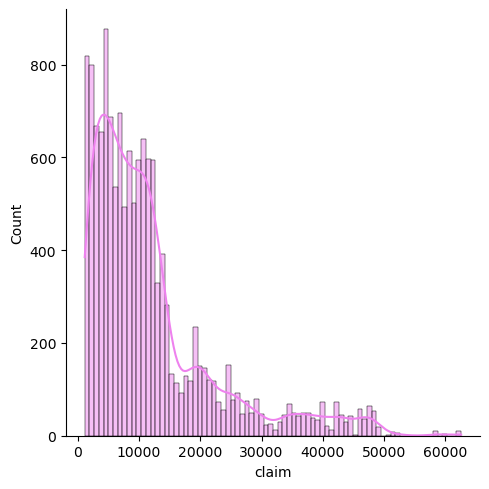

In [431]:
sns.displot(x='claim',data=df,color='violet',kde=True)
plt.show()

# Bivariate

# Bar Plot(Numerical-Categorical)

<Axes: xlabel='sex', ylabel='bmi'>

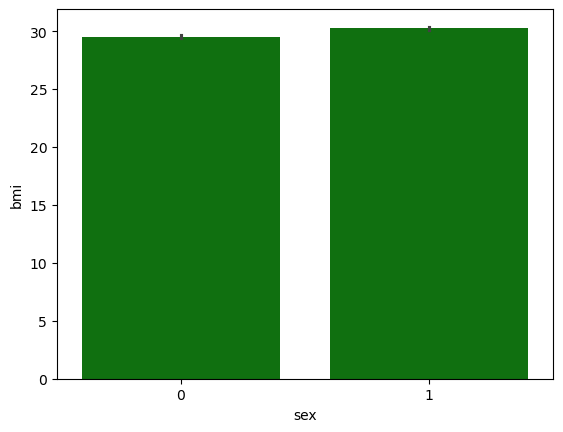

In [435]:
sns.barplot(x='sex',y='bmi',data=df,color='green')

<Axes: xlabel='sex', ylabel='weight'>

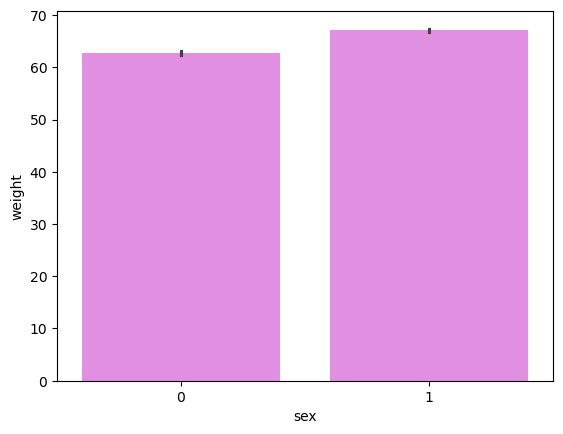

In [436]:
sns.barplot(x='sex',y='weight',data=df,color='violet')

<Axes: xlabel='sex', ylabel='hereditary_diseases'>

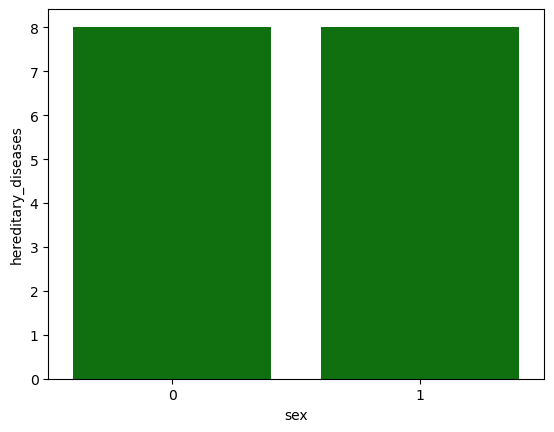

In [437]:
sns.barplot(x='sex',y='hereditary_diseases',data=df,color='green')

<Axes: xlabel='sex', ylabel='bloodpressure'>

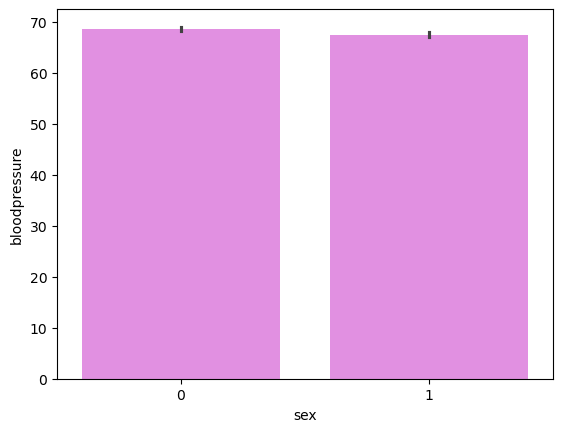

In [441]:
sns.barplot(x='sex',y='bloodpressure',data=df,color='violet')

In [448]:
sns.barplot(x='diabetes',y='age',data=df,color='green)

SyntaxError: unterminated string literal (detected at line 1) (4191676811.py, line 1)

<Axes: xlabel='diabetes', ylabel='weight'>

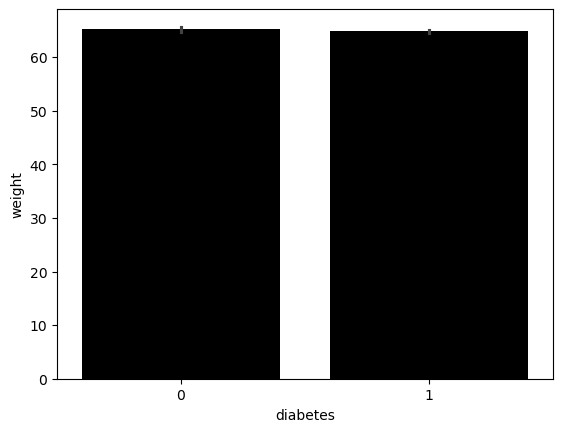

In [163]:
sns.barplot(x='diabetes',y='weight',data=df,color='black')

# Multivariate

# Scatterplot(Numerical-Numerical)

In [166]:
#from pandas.plotting import scatter_matrix

<Axes: xlabel='age', ylabel='weight'>

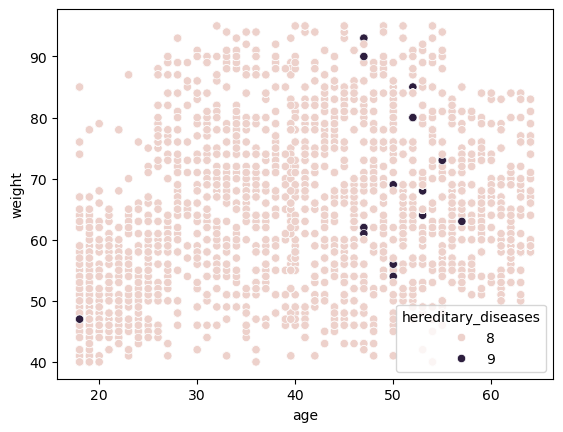

In [167]:
sns.scatterplot(x='age',y='weight',hue='hereditary_diseases',data=df)
#plt.show()

<Axes: xlabel='age', ylabel='bmi'>

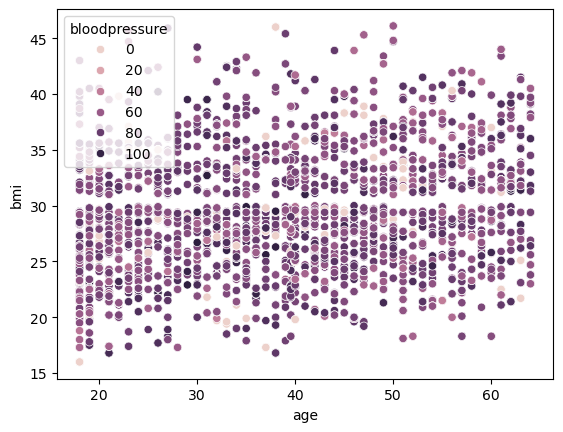

In [168]:
sns.scatterplot(x='age',y='bmi',hue='bloodpressure',data=df)

In [169]:
#sns.barplot(x='sex',y='age',hue='claim',data=df)
#plt.show()

In [170]:
co_re=df.corr()
print(co_re)
#sns.heatmap(df.co_re(),annot=True)
#plt.show()

                          age       sex    weight       bmi  \
age                  1.000000  0.020710  0.287004  0.198015   
sex                  0.020710  1.000000  0.157387  0.063890   
weight               0.287004  0.157387  1.000000  0.239669   
bmi                  0.198015  0.063890  0.239669  1.000000   
hereditary_diseases  0.019503  0.029133 -0.012799  0.050472   
no_of_dependents     0.048005  0.042390  0.152146  0.044125   
smoker              -0.006311  0.078518  0.032664 -0.045637   
bloodpressure       -0.006933 -0.030013 -0.029288 -0.051473   
diabetes             0.065893 -0.020763 -0.011388  0.074611   
regular_ex           0.014314  0.022397 -0.000026 -0.018721   
claim                0.360592  0.065959  0.111644  0.150368   
city_0              -0.006852  0.005443  0.004892 -0.002596   
city_1               0.002681  0.005234  0.002929  0.002985   
city_2               0.008990  0.002995 -0.004463 -0.003148   
city_3               0.002455 -0.011781 -0.006097 -0.00

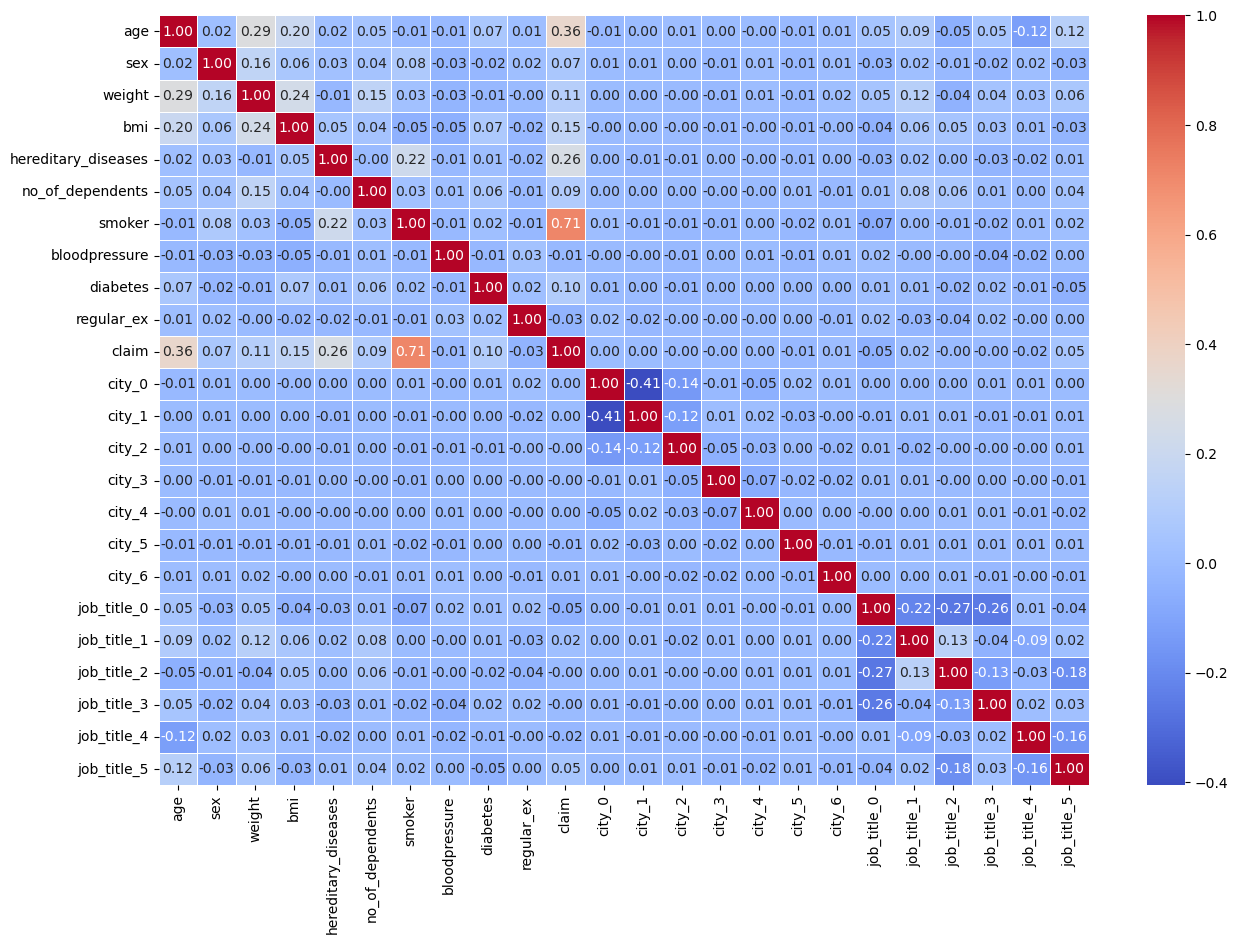

In [249]:
plt.figure(figsize=(15,10))
sns.heatmap(co_re,annot=True,cmap="coolwarm",fmt=".2f",linewidth=0.5)
plt.show()